The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In this data set we are going to predict and analyze the avaerage price and region considering them as target variable

In [359]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [360]:
#loading the dataset
df=pd.read_csv("avacado.csv")
#lets see insights of the data sets
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [361]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [362]:
#checking the data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [363]:
#checking the column values
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [364]:
#Checking the shape
df.shape

(1517, 14)

In [365]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


So in this dataset we have 1517 rows and 14 columns and no null values are present

In [366]:
#Observations
#Date - The date of the observation
#AveragePrice - the average price of a single avocado
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold
#Totalbags-total bags sold on respective dates
#Small Bags-total number of small bags sold respective dates
#Large Bags-total number of large bags sold respective dates
#XLarge Bags-total number of Xlarge bags sold respective dates

# Summary statistics

In [367]:
df.describe(include="all")

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,05-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [368]:
#values are recorded on 104 unique dates
#average price varies from .49 to 1.68
#price is normally distributed and thier is a large difference between 75% and max so chances of outliers are high
#there are 51 unique regions
#only conventional type is present
#values are recorded on 2 years of 2015 and 2016

In [369]:
#checking the unique year
print("Number of unique years:",df["year"].unique())
print("Number of values each year" ,df["year"].value_counts())

Number of unique years: [2015 2016]
Number of values each year 2015    1270
2016     247
Name: year, dtype: int64


<AxesSubplot:>

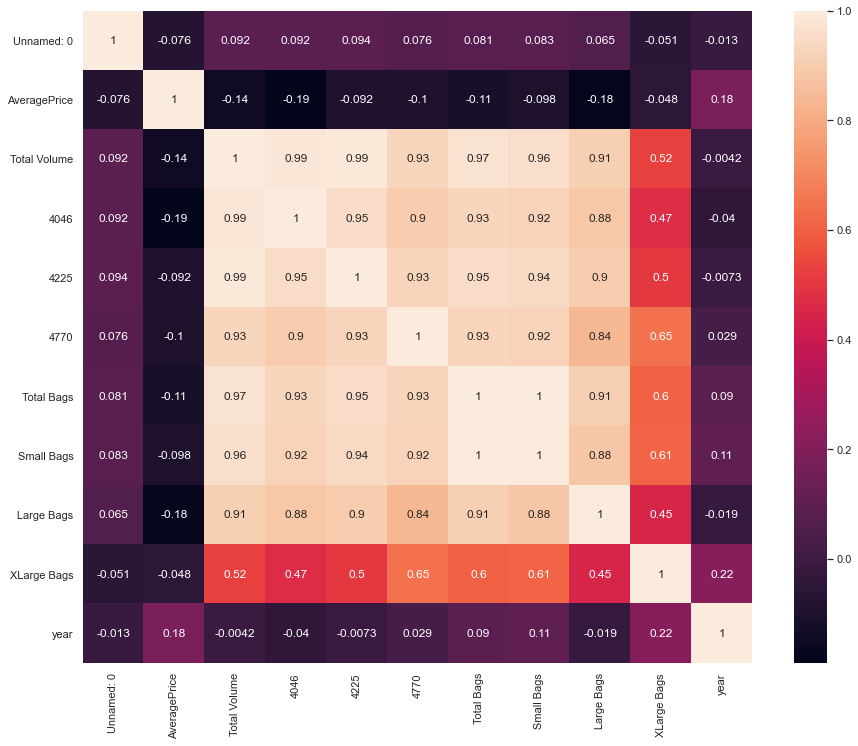

In [370]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [371]:
#there is an unamed column which needs to be removed and remaining all have good corelation with target variable

In [372]:
#droping the column
df.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [373]:
#for better analysis we will convert the object type of date into date format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


In [374]:

#Create new columns m date year, month, day since we have a column of year already
df['Month']=df['Date'].dt.month

df["day"]=df["Date"].dt.day

# Univariant analysis

In [375]:
#Check head to verify the data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


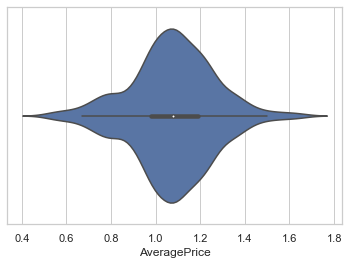

In [376]:
#analysis of average price
sns.set(style="whitegrid")
sns.violinplot(df["AveragePrice"])
plt.show()

In [377]:
#maximum number of average price is in range 1 to 1.2


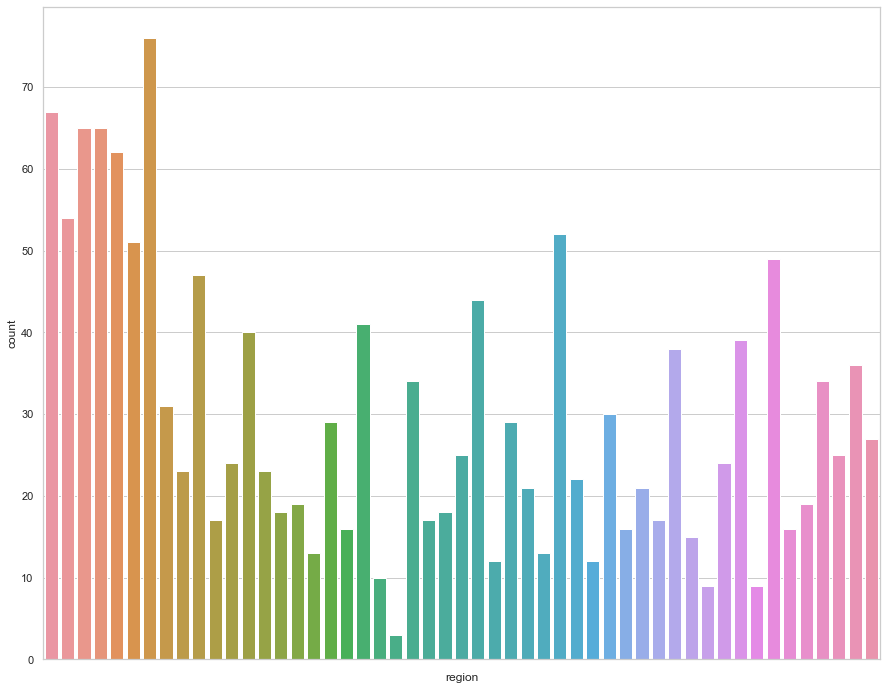

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [378]:
#analysis of the regions
plt.figure(figsize=(15,12))
sns.set(style="whitegrid")
sns.countplot(df["region"]).set(xticklabels=[])
plt.show()
max1=df["region"].value_counts()
print(max1)
print("california region has maximum frequncy of:",max1.max())
print("LosAngeles region has minimum frequncy of:",max1.min())

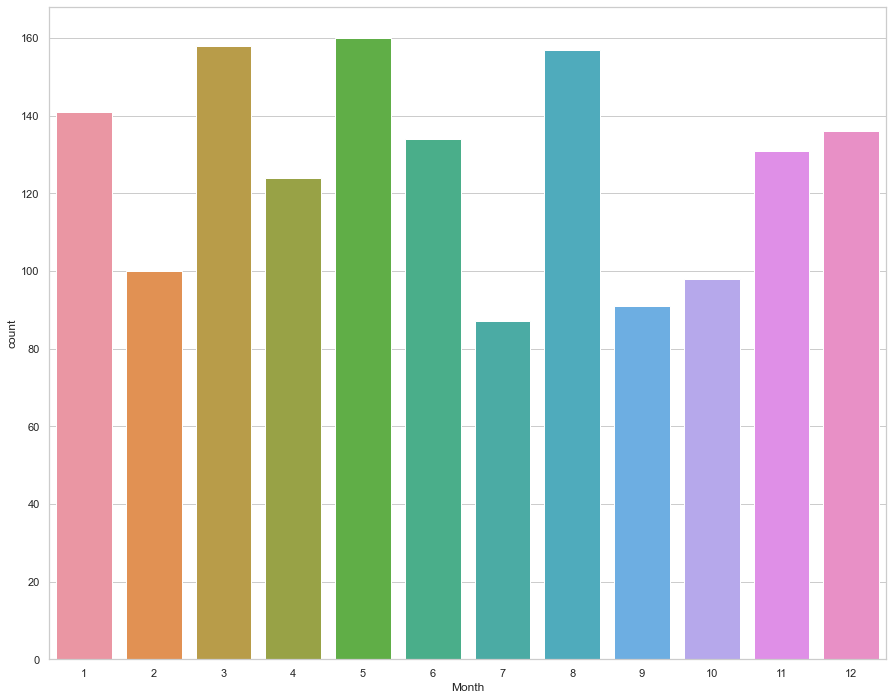

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: Month, dtype: int64
5th month has maximum frequncy of: 160
7th month has minimum frequncy of: 87


In [379]:
#analysis of the month
plt.figure(figsize=(15,12))
sns.set(style="whitegrid")
sns.countplot(df["Month"])
plt.show()
max1=df["Month"].value_counts()
print(max1)
print("5th month has maximum frequncy of:",max1.max())
print("7th month has minimum frequncy of:",max1.min())

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

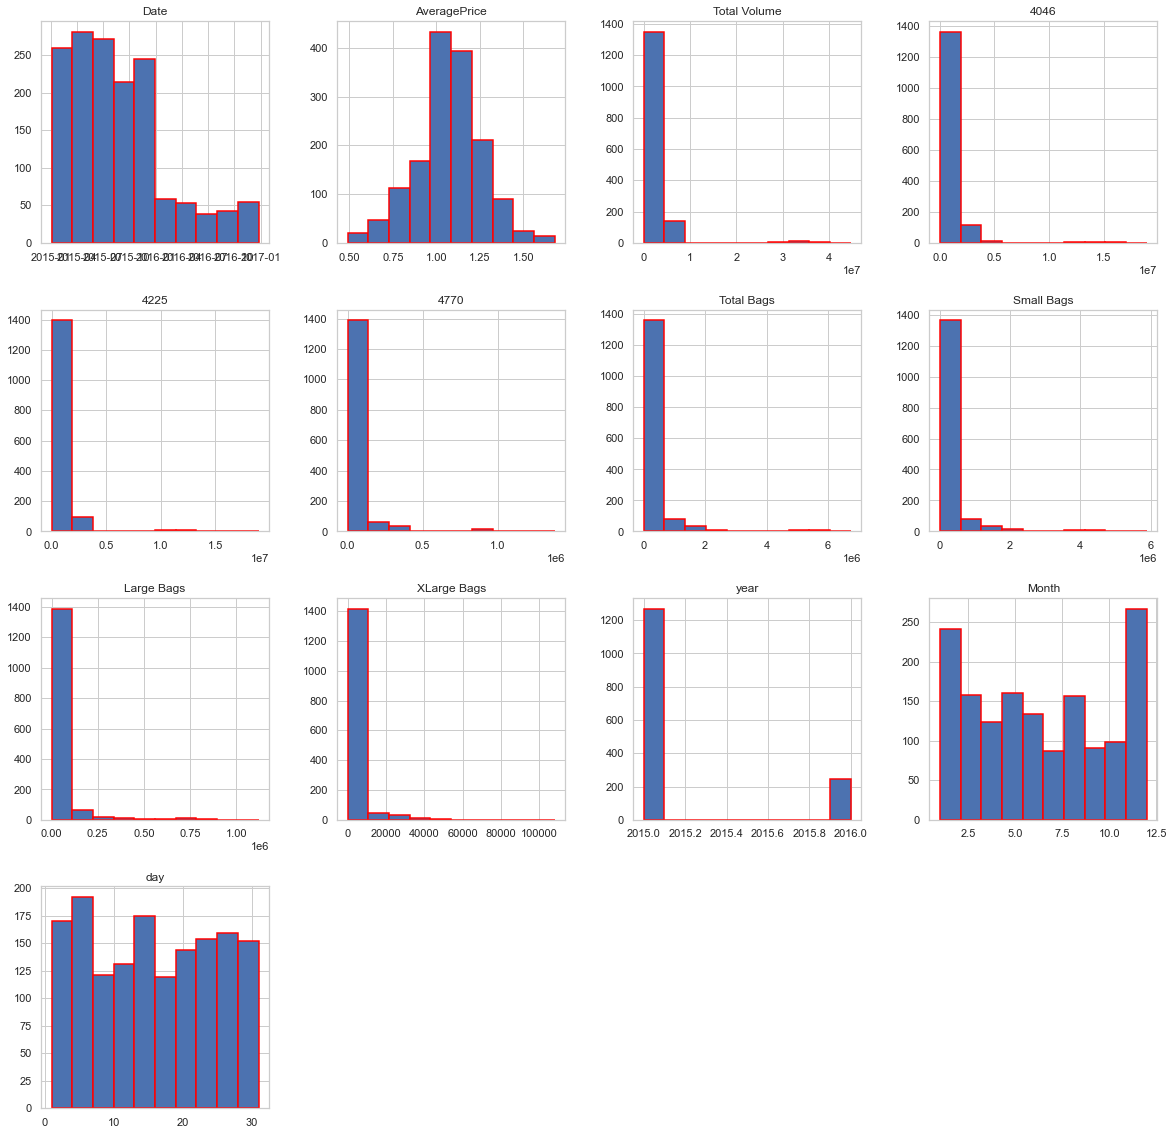

In [380]:
#checking the all the coulumns
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [381]:
 # most of the columns are skewd 

# Bi-Variant analysis

In [382]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


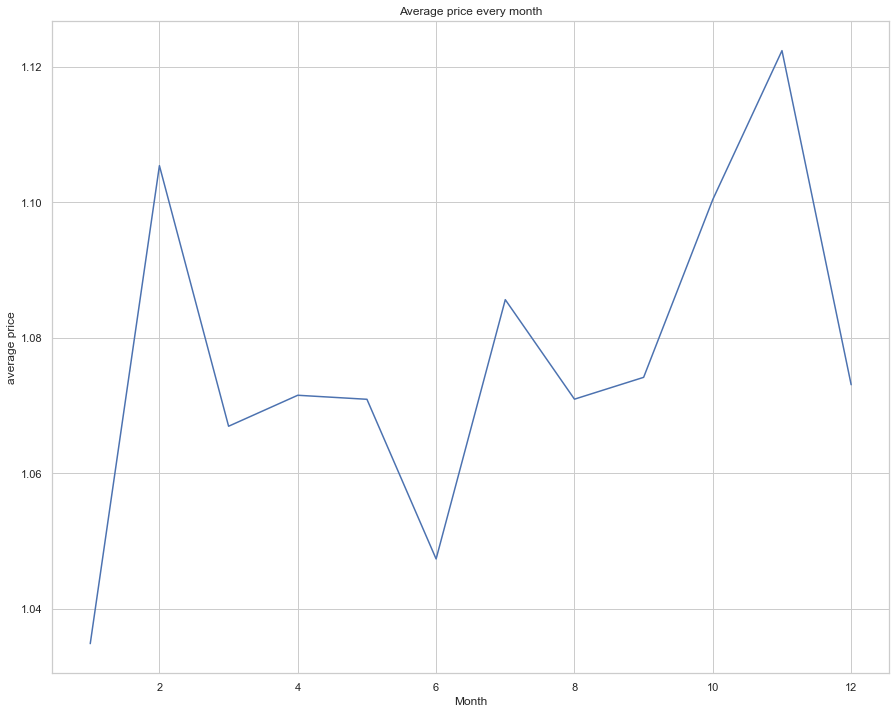

In [383]:
#analysis of average price each month 
av_and_month=df.groupby('Month').mean()["AveragePrice"]
month=range(1,13)
plt.figure(figsize=(15,12))
plt.title("Average price every month")
plt.xlabel("Month")
plt.ylabel("average price")
plt.plot(month,av_and_month)
plt.show()

In [384]:
#average price is lowest in the 1st month
#average price is highest in the 11th month

In [385]:
av_and_month=pd.DataFrame(av_and_month).reset_index()
av_and_month.rename(columns={"AveragePrice":"avrage price per month"},inplace=True)
#Creating a new column average price per month
df=pd.merge(df,av_and_month, on="Month",how="inner")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day,avrage price per month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27,1.073088
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20,1.073088
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13,1.073088
3,2015-12-07,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,conventional,2015,Albany,12,7,1.073088
4,2015-12-04,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,conventional,2015,Albany,12,4,1.073088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-03-04,0.93,6060843.76,1805555.95,2247248.19,334735.17,1673304.45,1454479.46,201547.46,17277.53,conventional,2016,California,3,4,1.066962
1513,2016-03-27,0.93,6603707.93,1935666.12,2149391.86,311356.91,2207293.04,1926353.76,259874.87,21064.41,conventional,2016,California,3,27,1.066962
1514,2016-03-20,0.91,6476206.54,1893617.80,2191468.26,299002.93,2092117.55,1883192.26,189928.31,18996.98,conventional,2016,California,3,20,1.066962
1515,2016-03-13,0.96,6017563.88,1750943.52,1855262.70,317337.27,2094020.39,1888085.99,186807.69,19126.71,conventional,2016,California,3,13,1.066962


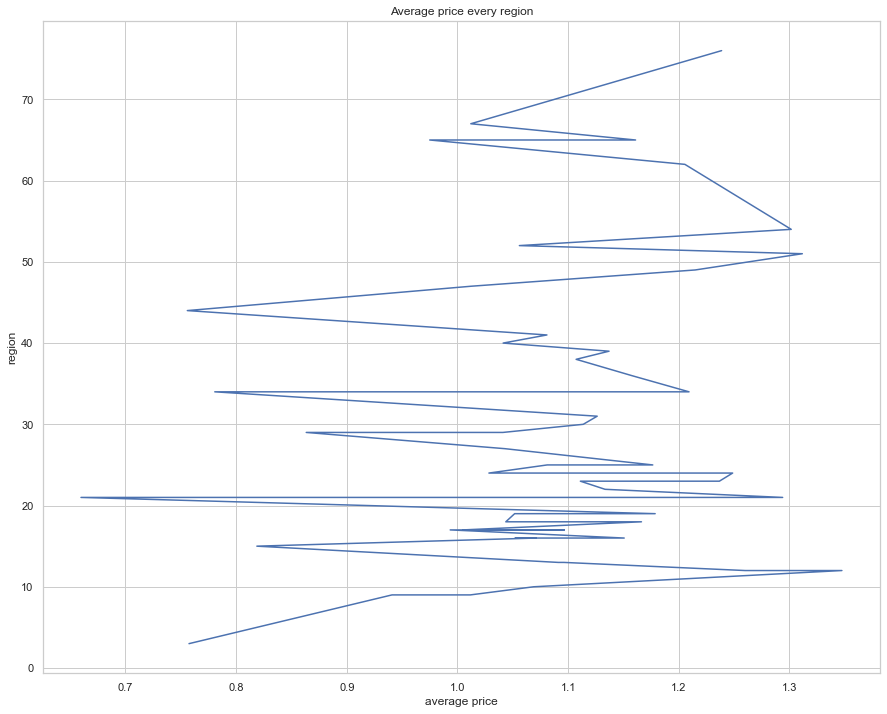

maximum average price is in  
           AveragePrice
region                
Syracuse      1.347368


minimum average price is in  
                AveragePrice
region                     
PhoenixTucson      0.659808


In [386]:
#analysis of average price each region
av_and_region=df.groupby('region').mean()["AveragePrice"]

plt.figure(figsize=(15,12))
plt.title("Average price every region")
plt.xlabel("average price")
plt.ylabel("region")
plt.plot(av_and_region,df["region"].value_counts())
plt.show()
a=pd.DataFrame(av_and_region)
#Observation
print("maximum average price is in ","\n",a[a.AveragePrice == a.AveragePrice.max()]) 
print("\n")
print("minimum average price is in ","\n",a[a.AveragePrice == a.AveragePrice.min()]) 

In [387]:
av_and_region=pd.DataFrame(av_and_region).reset_index()
av_and_region.rename(columns={"AveragePrice":"avrage price per region"},inplace=True)
#Creating a new column average price per month
df=pd.merge(df,av_and_region, on="region",how="inner")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day,avrage price per month,avrage price per region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27,1.073088,1.238657
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20,1.073088,1.238657
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13,1.073088,1.238657
3,2015-12-07,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,conventional,2015,Albany,12,7,1.073088,1.238657
4,2015-12-04,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,conventional,2015,Albany,12,4,1.073088,1.238657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2015-01-25,1.15,2778000.82,1990978.47,266024.34,18600.92,502397.09,281141.42,221255.67,0.00,conventional,2015,Southeast,1,25,1.034894,1.091111
1513,2015-01-18,1.19,2595783.66,1815847.03,273695.84,22004.31,484236.48,258541.90,225694.58,0.00,conventional,2015,Southeast,1,18,1.034894,1.091111
1514,2015-04-01,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,conventional,2015,Southeast,4,1,1.071532,1.091111
1515,2015-02-22,1.11,2796195.76,1960713.06,236520.37,34466.49,564495.84,437763.90,126731.94,0.00,conventional,2015,Southeast,2,22,1.105400,1.091111


In [388]:
#will drop few unessasry columns
list1=["Date","type"]
for i in list1:
    df.drop(labels=i, axis=1,inplace=True)

In [389]:
#Analysis of total volumne of avacaodo and its different types sold each month
df1 = df.groupby(['Month']).agg({"Total Volume":"sum","4046":"sum","4225":"sum", "4770":"sum"})
df1=pd.DataFrame(df1)
df1

,Total Volume,4046,4225,4770
Month,,,,
1,2.709289e+08,1.052402e+08,1.106519e+08,7915193.57
2,1.518207e+08,6.041852e+07,5.567515e+07,4736333.30
3,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84
4,2.225624e+08,9.158678e+07,8.485384e+07,6982008.99
5,3.212220e+08,1.448755e+08,1.124444e+08,10536503.27
6,2.382439e+08,1.017034e+08,8.519859e+07,7632180.05
7,1.610989e+08,6.751989e+07,5.796773e+07,5497559.38
8,2.255813e+08,8.973917e+07,8.907440e+07,6327070.83
9,1.026004e+08,3.738673e+07,4.352177e+07,3036352.94


Text(0.5, 1.0, 'Monthly distribution of  4770 type consumption')

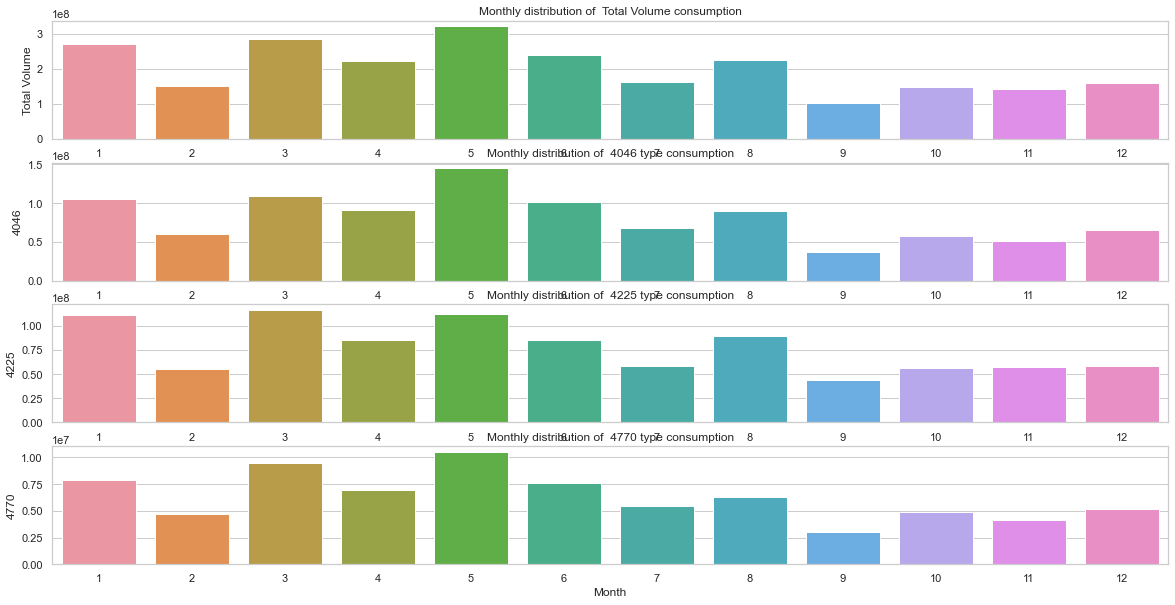

In [390]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,10))
sns.barplot(x=df1.index,y=df1["Total Volume"],ax=ax1)
ax1.set_title("Monthly distribution of  Total Volume consumption")
sns.barplot(x=df1.index,y=df1["4046"],ax=ax2)
ax2.set_title("Monthly distribution of  4046 type consumption")
sns.barplot(x=df1.index,y=df1["4225"],ax=ax3)
ax3.set_title("Monthly distribution of  4225 type consumption")
sns.barplot(x=df1.index,y=df1["4770"],ax=ax4)
ax4.set_title("Monthly distribution of  4770 type consumption")

In [391]:
#observations
Total_consumption_of_avacado=df1["Total Volume"].sum()
Total_consumption_of_4225type_avacado=df1["4225"].sum()
Total_consumption_of_4046type_avacado=df1["4046"].sum()
Total_consumption_of_4770type_avacado=df1["4770"].sum()
print("Total consumption of avacado is",Total_consumption_of_avacado)
print("Total consumption of 4225 type avacado",Total_consumption_of_4225type_avacado, ",so percentage of 4225 is",(Total_consumption_of_4225type_avacado/Total_consumption_of_avacado)*100)
print("Total consumption of 4046 type avacado",Total_consumption_of_4046type_avacado, ",so percentage of 4046 is",(Total_consumption_of_4046type_avacado/Total_consumption_of_avacado)*100)
print("Total consumption of 4225 type avacado",Total_consumption_of_4770type_avacado, ",so percentage of 4770 is",(Total_consumption_of_4770type_avacado/Total_consumption_of_avacado)*100)

Total consumption of avacado is 2430050545.91
Total consumption of 4225 type avacado 927550691.4300002 ,so percentage of 4225 is 38.17001638057093
Total consumption of 4046 type avacado 980647438.29 ,so percentage of 4046 is 40.35502224184268
Total consumption of 4225 type avacado 76465136.52 ,so percentage of 4770 is 3.1466479842856727


In [392]:
df1=df1.reset_index()
df1.rename(columns={"Total Volume":"avrage volume per month","4046":" avg 4046 per month","4225":"avg 4225 per month","4770":"avg 4770 per month"},inplace=True)
#Creating a new column average volume per month
df=pd.merge(df,df1, on="Month",how="inner")
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,day,avrage price per month,avrage price per region,avrage volume per month,avg 4046 per month,avg 4225 per month,avg 4770 per month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,12,27,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,12,20,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,12,13,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50
3,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,2015,Albany,12,7,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50
4,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,2015,Albany,12,4,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,339877.09,15819.32,222182.25,1168.94,100706.58,88306.35,12400.23,0.00,2015,Philadelphia,3,29,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84
1513,1.18,449261.63,27380.04,322071.00,1104.04,98706.55,85471.81,13234.74,0.00,2015,Philadelphia,3,22,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84
1514,1.44,331456.96,15055.12,199103.98,1077.74,116220.12,102101.20,14118.92,0.00,2015,Philadelphia,3,15,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84
1515,1.09,1651115.09,885071.63,450192.76,11548.82,304301.88,293708.39,9411.90,1181.59,2015,Plains,3,22,1.066962,1.051667,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84


In [393]:
##Analysis of total bags of avacaodo and its different types sold each month
df2 = df.groupby(['Month']).agg({"Total Bags":"sum","Small Bags":"sum","Large Bags":"sum", "XLarge Bags":"sum"})
df2=pd.DataFrame(df2)
df2

,Total Bags,Small Bags,Large Bags,XLarge Bags
Month,,,,
1,47121589.41,38662577.78,8178534.88,280476.75
2,30990736.65,26915856.19,3935484.11,139396.35
3,52072142.15,44760401.78,6972783.97,338956.40
4,39139767.28,32952328.26,5914112.83,273326.19
5,53365558.17,46225266.95,6790773.38,349517.84
6,43709745.82,37236228.12,6184010.09,289507.61
7,30113746.18,25702660.68,4118739.43,292346.07
8,40440658.56,34745633.02,5396875.10,298150.44
9,18655539.17,15182053.90,3276842.50,196642.77


Text(0.5, 1.0, 'Monthly distribution of  XLarge Bags sold')

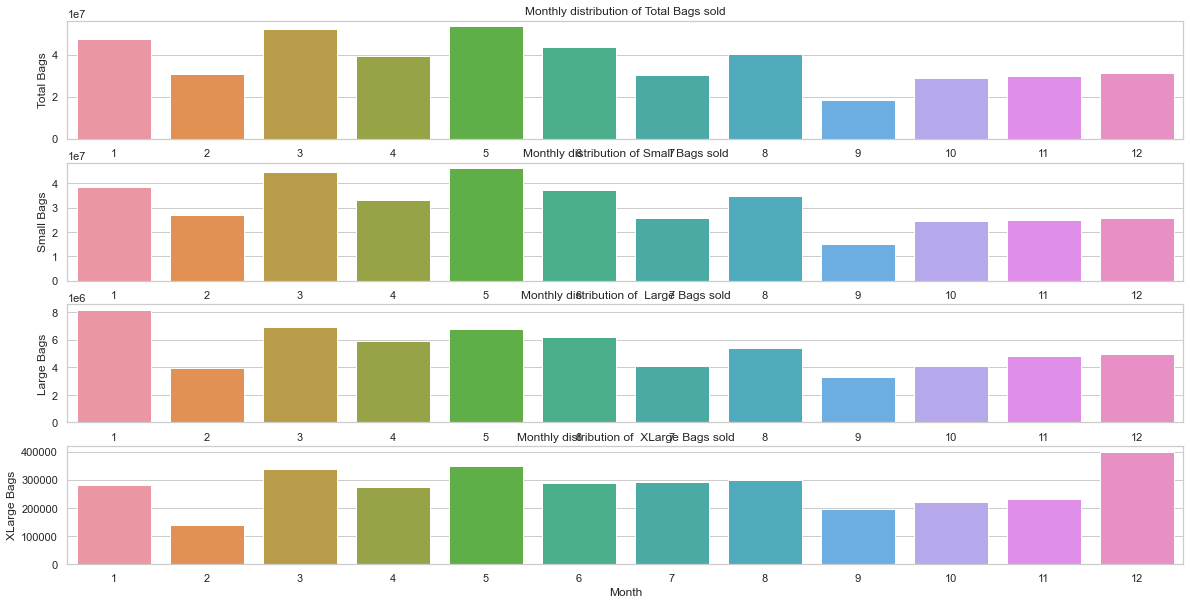

In [394]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,10))
sns.barplot(x=df2.index,y=df2["Total Bags"],ax=ax1)
ax1.set_title("Monthly distribution of Total Bags sold")
sns.barplot(x=df2.index,y=df2["Small Bags"],ax=ax2)
ax2.set_title("Monthly distribution of Small Bags sold")
sns.barplot(x=df2.index,y=df2["Large Bags"],ax=ax3)
ax3.set_title("Monthly distribution of  Large Bags sold")
sns.barplot(x=df2.index,y=df2["XLarge Bags"],ax=ax4)
ax4.set_title("Monthly distribution of  XLarge Bags sold")

In [395]:
#observations
Total_consumption_of_avacado_Total_Bags=df2["Total Bags"].sum()
Total_consumption_of_Small_Bags_avacado=df2["Small Bags"].sum()
Total_consumption_of_Large_Bags_avacado=df2["Large Bags"].sum()
Total_consumption_of_XLarge_Bags_avacado=df2["XLarge Bags"].sum()
print("Total bags of avacado is",Total_consumption_of_avacado_Total_Bags)
print("Total small bags  avacado",Total_consumption_of_Small_Bags_avacado, ",so percentage of small bags is",(Total_consumption_of_Small_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)
print("Total large bags avacado",Total_consumption_of_Large_Bags_avacado, ",so percentage of large bags is",(Total_consumption_of_Large_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)
print("Total Xlarge bags  avacado",Total_consumption_of_XLarge_Bags_avacado, ",so percentage of Xlarge bags is",(Total_consumption_of_XLarge_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)

Total bags of avacado is 445387279.6699999
Total small bags  avacado 377389544.04999995 ,so percentage of small bags is 84.73289680154733
Total large bags avacado 64687988.9 ,so percentage of large bags is 14.523986618551202
Total Xlarge bags  avacado 3309746.7199999993 ,so percentage of Xlarge bags is 0.7431165799014926


In [396]:
df2=df2.reset_index()
df2.rename(columns={"Total Bags":"Avg Total Bags per month","Small Bags":"Avg Small Bags per month","Large Bags":"Avg Large Bags per month","XLarge Bags":"Avg XLarge Bags per month"},inplace=True)
#Creating a new column average bags  volume per month
df=pd.merge(df,df2, on="Month",how="inner")
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,avrage price per month,avrage price per region,avrage volume per month,avg 4046 per month,avg 4225 per month,avg 4770 per month,Avg Total Bags per month,Avg Small Bags per month,Avg Large Bags per month,Avg XLarge Bags per month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21
3,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,2015,...,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21
4,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,2015,...,1.073088,1.238657,1.598977e+08,6.495465e+07,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,339877.09,15819.32,222182.25,1168.94,100706.58,88306.35,12400.23,0.00,2015,...,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84,52072142.15,44760401.78,6972783.97,338956.40
1513,1.18,449261.63,27380.04,322071.00,1104.04,98706.55,85471.81,13234.74,0.00,2015,...,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84,52072142.15,44760401.78,6972783.97,338956.40
1514,1.44,331456.96,15055.12,199103.98,1077.74,116220.12,102101.20,14118.92,0.00,2015,...,1.066962,1.293846,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84,52072142.15,44760401.78,6972783.97,338956.40
1515,1.09,1651115.09,885071.63,450192.76,11548.82,304301.88,293708.39,9411.90,1181.59,2015,...,1.066962,1.051667,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84,52072142.15,44760401.78,6972783.97,338956.40


In [397]:
#Analysis of total bags of avacaodo and its different types sold each region
df3 = df.groupby(['region']).agg({"Total Bags":"sum","Small Bags":"sum","Large Bags":"sum", "XLarge Bags":"sum"})
df3=pd.DataFrame(df3)
df3.drop(labels="TotalUS",inplace=True)#need to drop total us row
df3

,Total Bags,Small Bags,Large Bags,XLarge Bags
region,,,,
Albany,8.151414e+05,791638.22,23265.54,237.66
Atlanta,4.655737e+06,2560139.29,2092341.37,3256.55
BaltimoreWashington,1.200439e+07,11712284.14,274394.07,17711.40
Boise,1.693534e+06,1642547.60,48642.24,2343.66
Boston,7.586084e+06,7502993.05,47420.62,35670.27
BuffaloRochester,3.397356e+06,3342930.30,19601.98,34824.16
California,1.075493e+08,97794801.75,8326194.48,1428264.97
Charlotte,1.797625e+06,1634004.88,162146.36,1473.61
Chicago,2.260864e+06,2178184.42,70406.78,12272.83


Text(0.5, 1.0, 'regional distribution of  XLarge Bags sold')

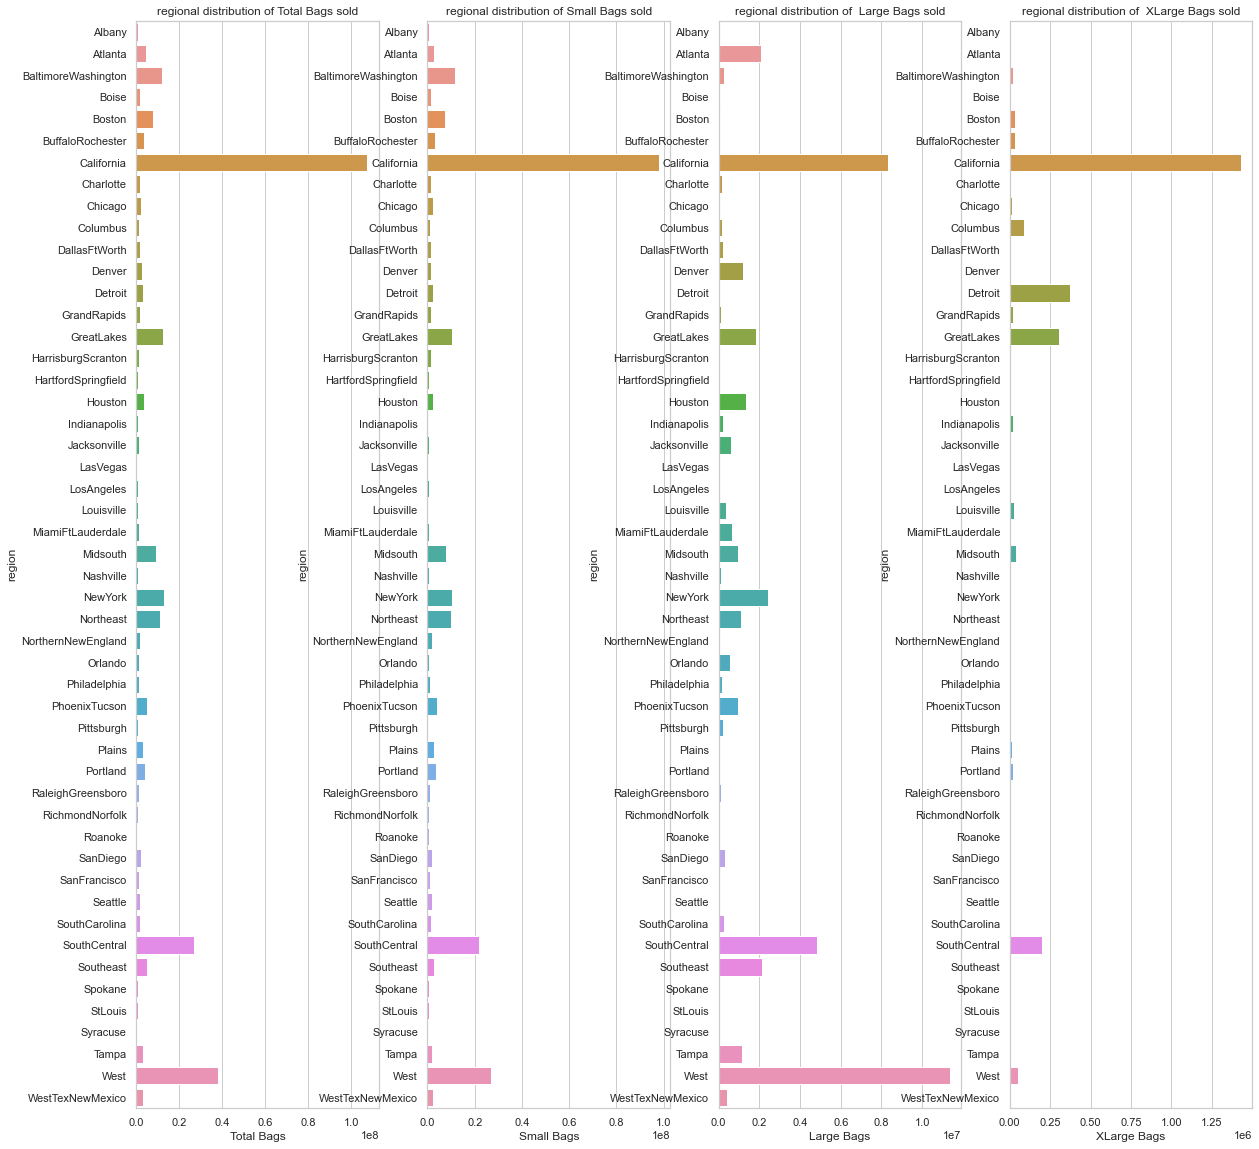

In [398]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
sns.barplot(x=df3["Total Bags"],y=df3.index,ax=ax1)
ax1.set_title("regional distribution of Total Bags sold")
sns.barplot(x=df3["Small Bags"],y=df3.index,ax=ax2)
ax2.set_title("regional distribution of Small Bags sold")
sns.barplot(x=df3["Large Bags"],y=df3.index,ax=ax3)
ax3.set_title("regional distribution of  Large Bags sold")
sns.barplot(x=df3["XLarge Bags"],y=df3.index,ax=ax4)
ax4.set_title("regional distribution of  XLarge Bags sold")

In [399]:
#Observation
print("maximum number of bags sold","\n",df3[df3["Total Bags"] == df3["Total Bags"].max()]  )
print("\n")
print("mainimum number of bags sold","\n",df3[df3["Total Bags"] == df3["Total Bags"].min()]  )

maximum number of bags sold 
              Total Bags   Small Bags  Large Bags  XLarge Bags
region                                                       
California  107549261.2  97794801.75  8326194.48   1428264.97


mainimum number of bags sold 
           Total Bags  Small Bags  Large Bags  XLarge Bags
region                                                   
LasVegas   367812.02   362788.85     5023.17          0.0


In [400]:
df3=df3.reset_index()
df3.rename(columns={"Total Bags":"Avg Total Bags per region","Small Bags":"Avg Small Bags per region","Large Bags":"Avg Large Bags per region","XLarge Bags":"Avg XLarge Bags per region"},inplace=True)
#Creating a new column average bags  volume per month
df=pd.merge(df,df3, on="region",how="inner")
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,avg 4225 per month,avg 4770 per month,Avg Total Bags per month,Avg Small Bags per month,Avg Large Bags per month,Avg XLarge Bags per month,Avg Total Bags per region,Avg Small Bags per region,Avg Large Bags per region,Avg XLarge Bags per region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66
3,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,2015,...,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66
4,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,2015,...,5.849401e+07,5219679.50,31229306.89,25853661.06,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1.15,2778000.82,1990978.47,266024.34,18600.92,502397.09,281141.42,221255.67,0.00,2015,...,1.106519e+08,7915193.57,47121589.41,38662577.78,8178534.88,280476.75,4976549.65,2849040.16,2127506.51,2.98
1488,1.19,2595783.66,1815847.03,273695.84,22004.31,484236.48,258541.90,225694.58,0.00,2015,...,1.106519e+08,7915193.57,47121589.41,38662577.78,8178534.88,280476.75,4976549.65,2849040.16,2127506.51,2.98
1489,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,2015,...,8.485384e+07,6982008.99,39139767.28,32952328.26,5914112.83,273326.19,4976549.65,2849040.16,2127506.51,2.98
1490,1.11,2796195.76,1960713.06,236520.37,34466.49,564495.84,437763.90,126731.94,0.00,2015,...,5.567515e+07,4736333.30,30990736.65,26915856.19,3935484.11,139396.35,4976549.65,2849040.16,2127506.51,2.98


In [401]:
#Analysis of total volumne of avacaodo and its different types sold each region
df4 = df.groupby(['region']).agg({"Total Volume":"sum","4046":"sum","4225":"sum", "4770":"sum"})
df4=pd.DataFrame(df4)

df4

,Total Volume,4046,4225,4770
region,,,,
Albany,5.111443e+06,1.160478e+05,4.144253e+06,36001.05
Atlanta,2.525241e+07,1.736038e+07,3.188675e+06,47617.71
BaltimoreWashington,5.249687e+07,3.811506e+06,3.420130e+07,2479680.24
Boise,5.268001e+06,2.781901e+06,4.200372e+05,372529.65
Boston,3.431443e+07,4.619336e+05,2.495051e+07,1315901.45
BuffaloRochester,6.741403e+06,8.039075e+04,3.253675e+06,9980.56
California,4.586810e+08,1.831613e+08,1.508466e+08,17123902.95
Charlotte,5.464623e+06,1.343049e+06,1.395879e+06,928069.90
Chicago,1.867329e+07,8.773167e+05,1.306783e+07,2467283.51


Text(0.5, 1.0, 'regional distribution of  4770 type consumption')

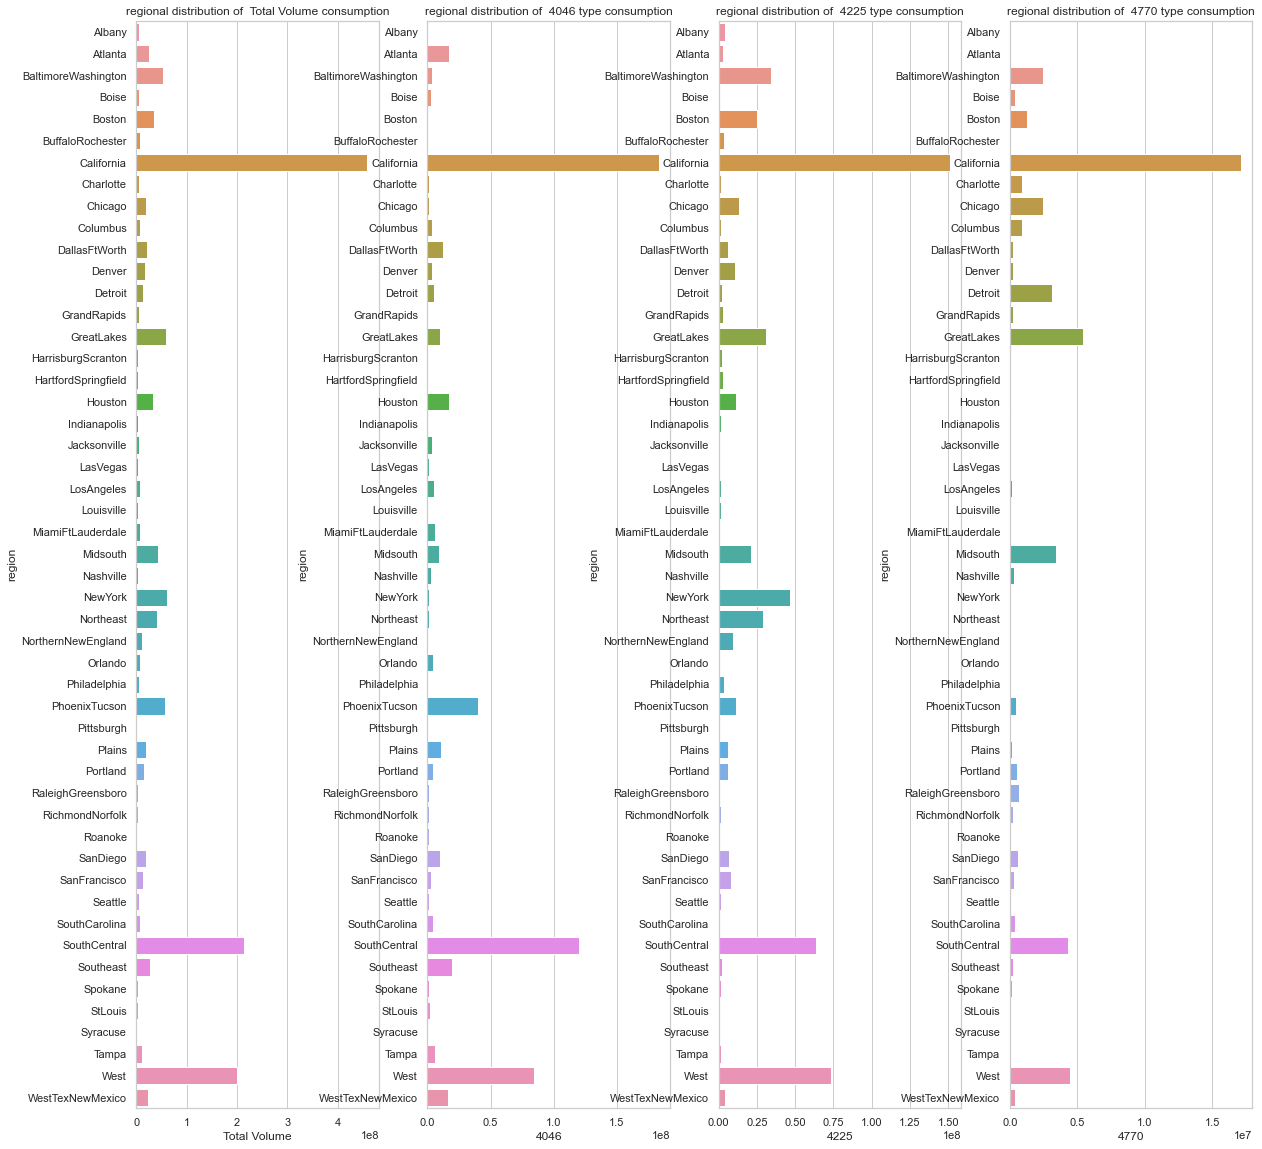

In [402]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
sns.barplot(x=df4["Total Volume"],y=df4.index,ax=ax1)
ax1.set_title("regional distribution of  Total Volume consumption")
sns.barplot(x=df4["4046"],y=df4.index,ax=ax2)
ax2.set_title("regional distribution of  4046 type consumption")
sns.barplot(x=df4["4225"],y=df4.index,ax=ax3)
ax3.set_title("regional distribution of  4225 type consumption")
sns.barplot(x=df4["4770"],y=df4.index,ax=ax4)
ax4.set_title("regional distribution of  4770 type consumption")

In [403]:
#Observation
print("maximum number of avacados sold","\n",df4[df4["Total Volume"] == df4["Total Volume"].max()]  )
print("\n")
print("mainimum number of avacados sold","\n",df4[df4["Total Volume"] == df4["Total Volume"].min()]  )

maximum number of avacados sold 
             Total Volume          4046          4225         4770
region                                                           
California  4.586810e+08  1.831613e+08  1.508466e+08  17123902.95


mainimum number of avacados sold 
           Total Volume      4046       4225    4770
region                                             
Syracuse     922989.83  21006.15  469298.26  516.71


In [404]:
df4=df4.reset_index()
df4.rename(columns={"Total Volume":"avrage volume per region","4046":" avg 4046 per region","4225":"avg 4225 per region","4770":"avg 4770 per region"},inplace=True)
#Creating a new column average volume per month
df=pd.merge(df,df4, on="region",how="inner")
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Avg Large Bags per month,Avg XLarge Bags per month,Avg Total Bags per region,Avg Small Bags per region,Avg Large Bags per region,Avg XLarge Bags per region,avrage volume per region,avg 4046 per region,avg 4225 per region,avg 4770 per region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05
3,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,2015,...,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05
4,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,2015,...,4975644.62,400001.21,815141.42,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1.15,2778000.82,1990978.47,266024.34,18600.92,502397.09,281141.42,221255.67,0.00,2015,...,8178534.88,280476.75,4976549.65,2849040.16,2127506.51,2.98,27497149.34,19761251.18,2543715.33,215633.18
1488,1.19,2595783.66,1815847.03,273695.84,22004.31,484236.48,258541.90,225694.58,0.00,2015,...,8178534.88,280476.75,4976549.65,2849040.16,2127506.51,2.98,27497149.34,19761251.18,2543715.33,215633.18
1489,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,2015,...,5914112.83,273326.19,4976549.65,2849040.16,2127506.51,2.98,27497149.34,19761251.18,2543715.33,215633.18
1490,1.11,2796195.76,1960713.06,236520.37,34466.49,564495.84,437763.90,126731.94,0.00,2015,...,3935484.11,139396.35,4976549.65,2849040.16,2127506.51,2.98,27497149.34,19761251.18,2543715.33,215633.18


In [405]:
Avg_price_per_year=pd.DataFrame(df.groupby(['year'])["AveragePrice"].mean()).rename(columns={"AveragePrice":"Avg price per year"})
Avg_volum_per_year=pd.DataFrame(df.groupby(['year'])["Total Volume"].mean()).rename(columns={"Total Volume":"Avg volume per year"})
Avg_Bags_per_year=pd.DataFrame(df.groupby(['year'])["Total Bags"].mean()).rename(columns={"Total Bags":"Total Bags per year"})
list1=[Avg_price_per_year,Avg_volum_per_year,Avg_Bags_per_year]

In [406]:
#Adding some more columns
for i in list1:
    df=pd.merge(df,i, on='year',how="inner")
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Avg Small Bags per region,Avg Large Bags per region,Avg XLarge Bags per region,avrage volume per region,avg 4046 per region,avg 4225 per region,avg 4770 per region,Avg price per year,Avg volume per year,Total Bags per year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05,1.061084,9.810076e+05,161902.687341
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05,1.061084,9.810076e+05,161902.687341
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05,1.061084,9.810076e+05,161902.687341
3,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,2015,...,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05,1.061084,9.810076e+05,161902.687341
4,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,2015,...,791638.22,23265.54,237.66,5111443.09,116047.78,4144252.84,36001.05,1.061084,9.810076e+05,161902.687341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,48016.74,11766.37,0.00,2016,...,1634004.88,162146.36,1473.61,5464622.65,1343048.60,1395879.30,928069.90,1.151498,1.559787e+06,448417.955992
1488,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,...,1634004.88,162146.36,1473.61,5464622.65,1343048.60,1395879.30,928069.90,1.151498,1.559787e+06,448417.955992
1489,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,...,1634004.88,162146.36,1473.61,5464622.65,1343048.60,1395879.30,928069.90,1.151498,1.559787e+06,448417.955992
1490,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016,...,1634004.88,162146.36,1473.61,5464622.65,1343048.60,1395879.30,928069.90,1.151498,1.559787e+06,448417.955992


<AxesSubplot:>

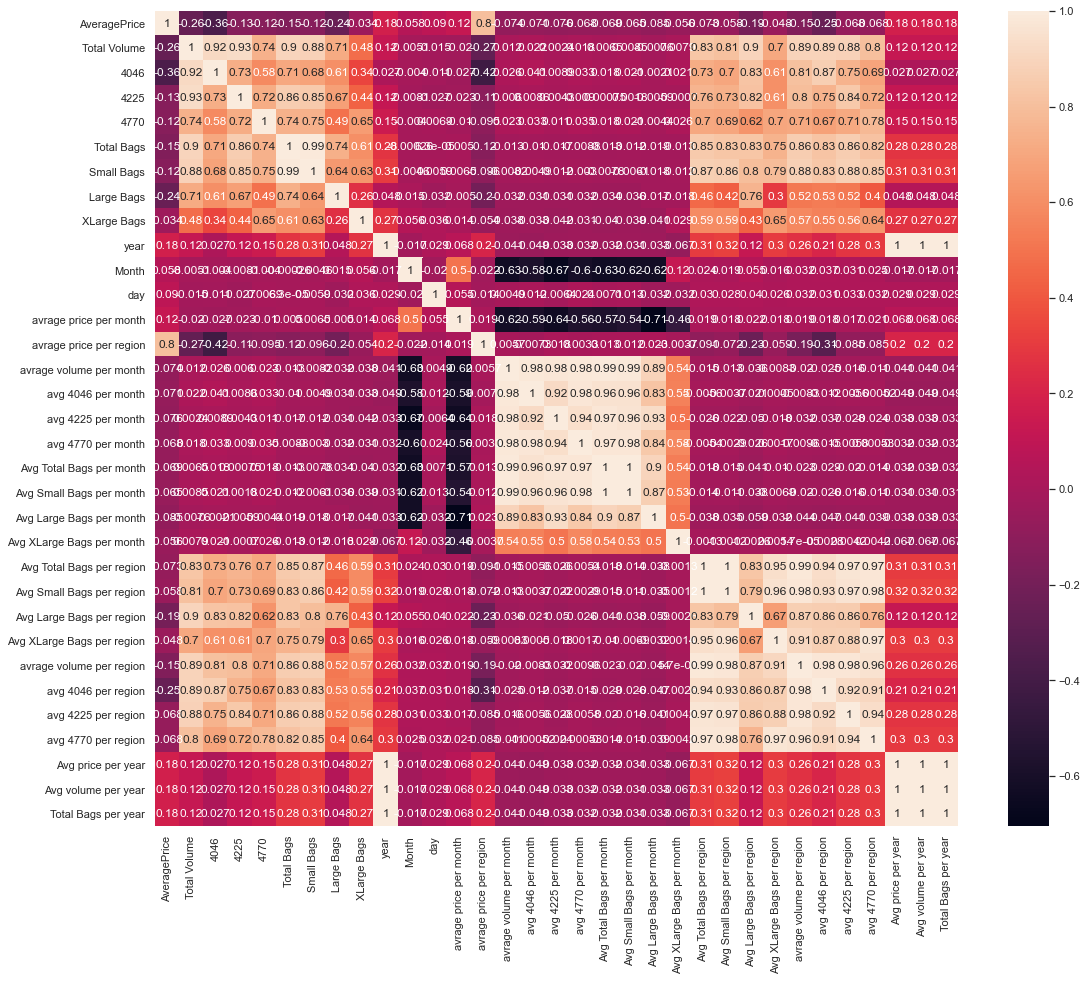

In [407]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

#from the table and graph wew can see columns like total bags, total volumn,small bags, large bags, 4046 4225,4770 all are highly corelated to each other


AveragePrice                      AxesSubplot(0.125,0.71587;0.0731132x0.16413)
Total Volume                   AxesSubplot(0.212736,0.71587;0.0731132x0.16413)
4046                           AxesSubplot(0.300472,0.71587;0.0731132x0.16413)
4225                           AxesSubplot(0.388208,0.71587;0.0731132x0.16413)
4770                           AxesSubplot(0.475943,0.71587;0.0731132x0.16413)
Total Bags                     AxesSubplot(0.563679,0.71587;0.0731132x0.16413)
Small Bags                     AxesSubplot(0.651415,0.71587;0.0731132x0.16413)
Large Bags                     AxesSubplot(0.739151,0.71587;0.0731132x0.16413)
XLarge Bags                    AxesSubplot(0.826887,0.71587;0.0731132x0.16413)
year                             AxesSubplot(0.125,0.518913;0.0731132x0.16413)
Month                         AxesSubplot(0.212736,0.518913;0.0731132x0.16413)
day                           AxesSubplot(0.300472,0.518913;0.0731132x0.16413)
avrage price per month        AxesSubplot(0.388208,0

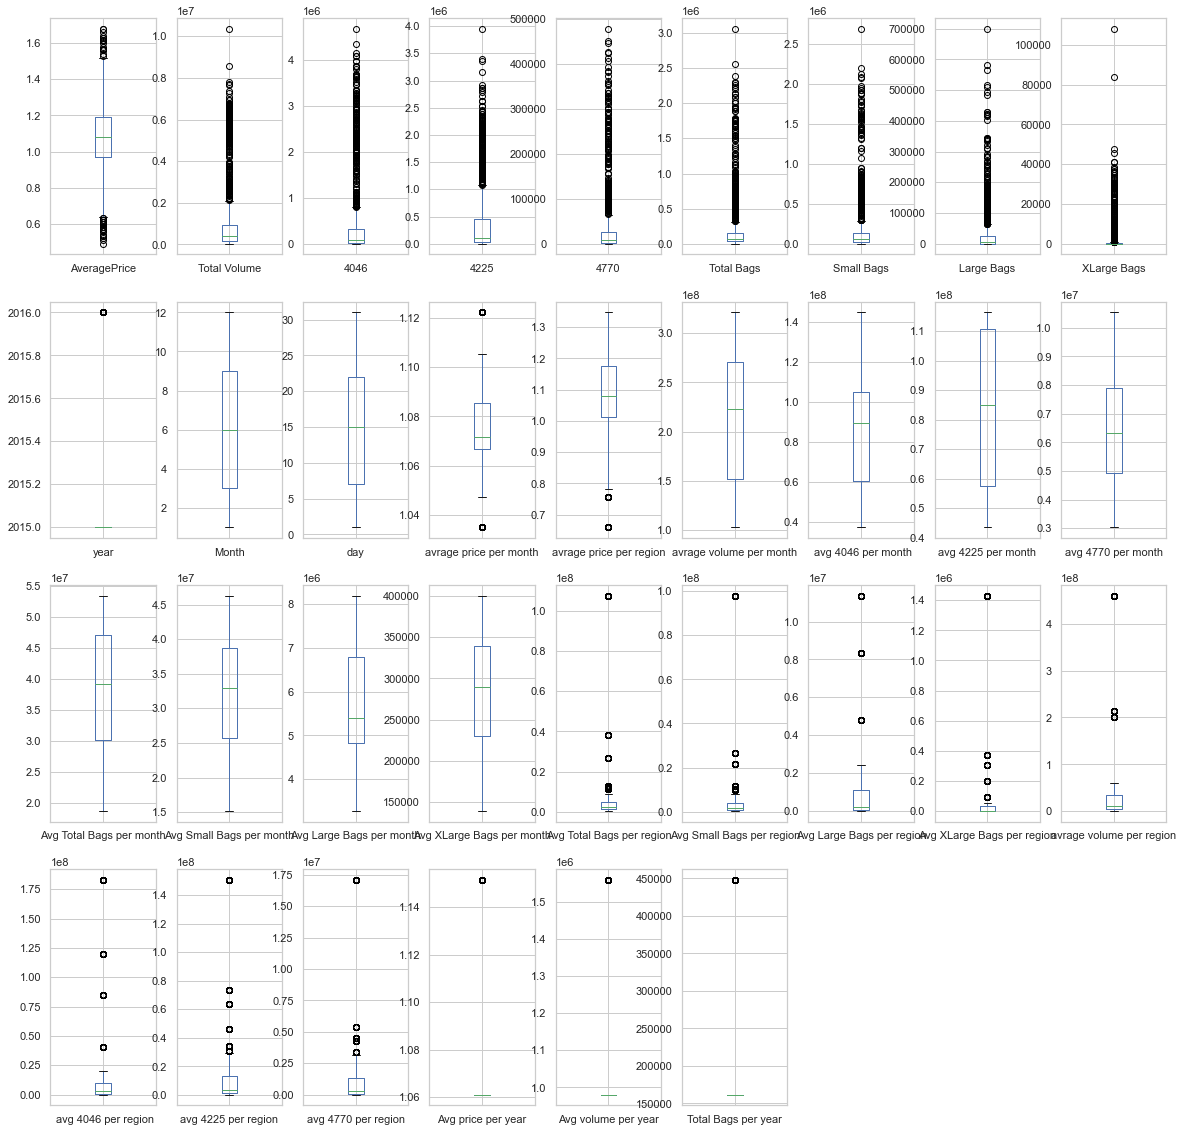

In [408]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,9),figsize=(20,20))

In [409]:
#exept month all the columns have outliers
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'day', 'avrage price per month', 'avrage price per region',
       'avrage volume per month', ' avg 4046 per month', 'avg 4225 per month',
       'avg 4770 per month', 'Avg Total Bags per month',
       'Avg Small Bags per month', 'Avg Large Bags per month',
       'Avg XLarge Bags per month', 'Avg Total Bags per region',
       'Avg Small Bags per region', 'Avg Large Bags per region',
       'Avg XLarge Bags per region', 'avrage volume per region',
       ' avg 4046 per region', 'avg 4225 per region', 'avg 4770 per region',
       'Avg price per year', 'Avg volume per year', 'Total Bags per year'],
      dtype='object')

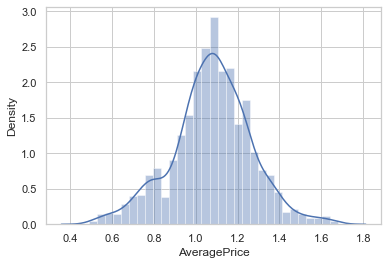

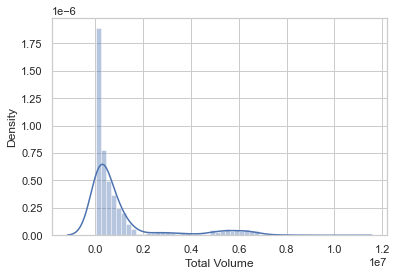

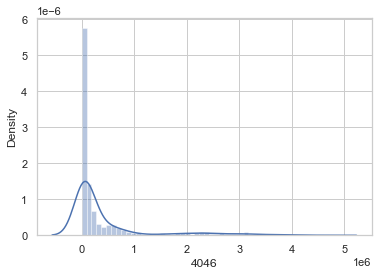

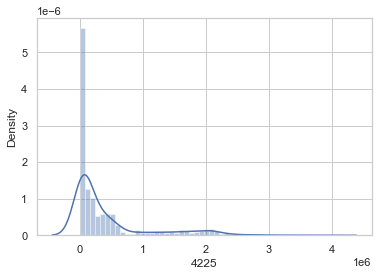

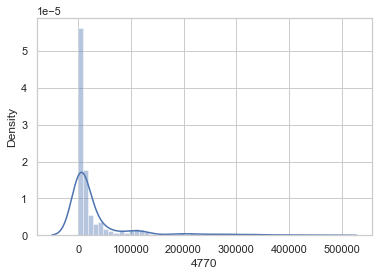

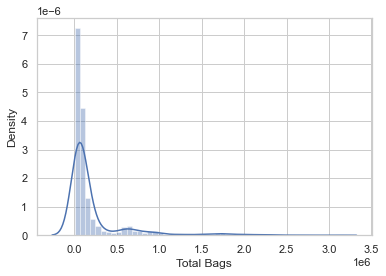

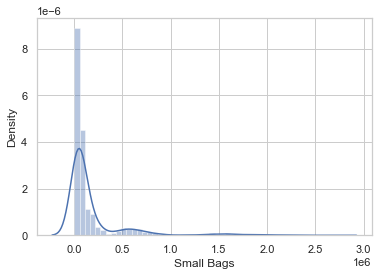

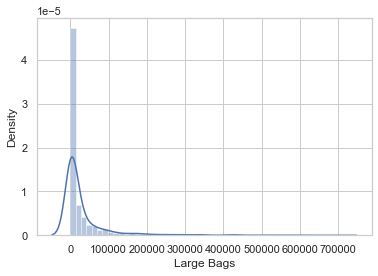

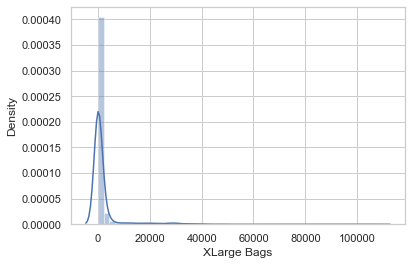

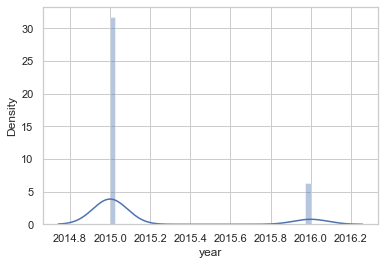

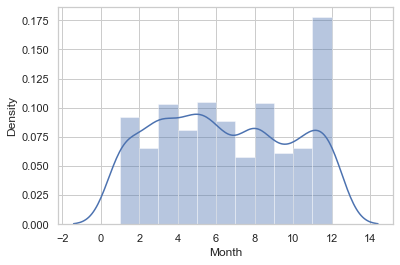

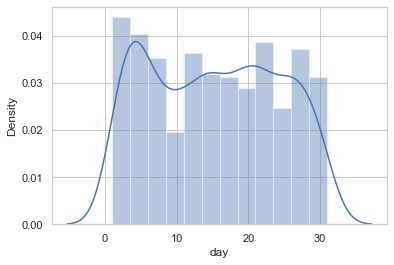

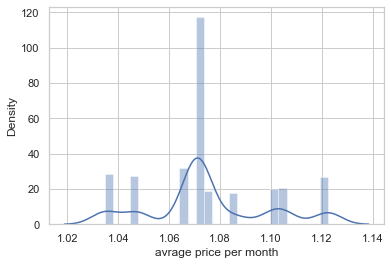

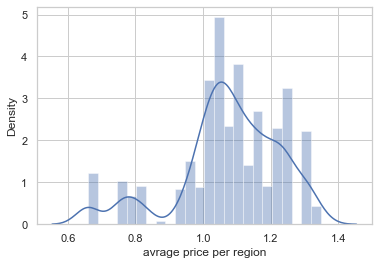

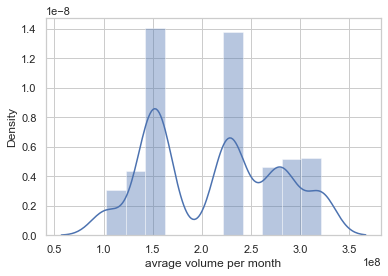

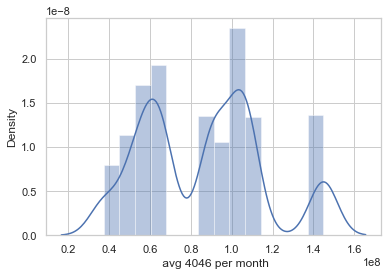

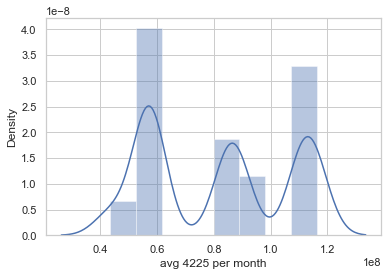

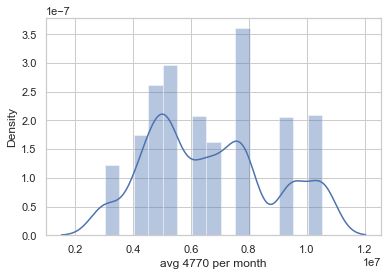

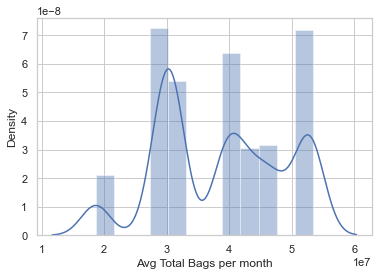

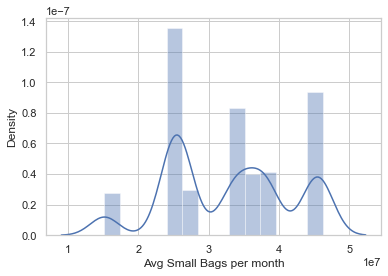

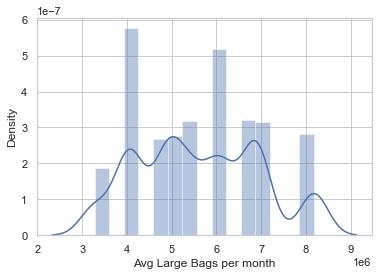

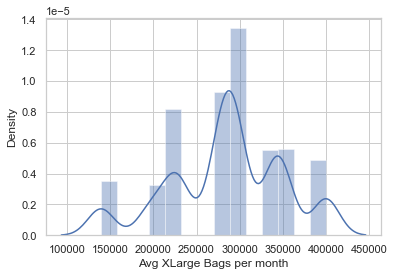

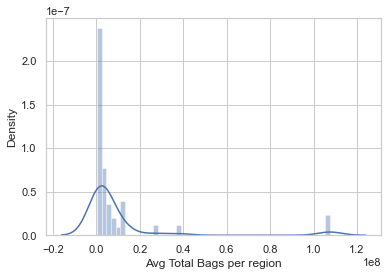

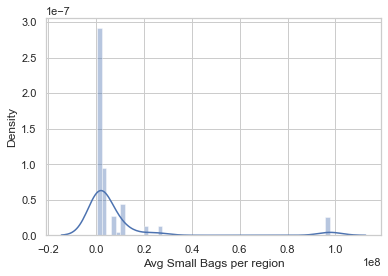

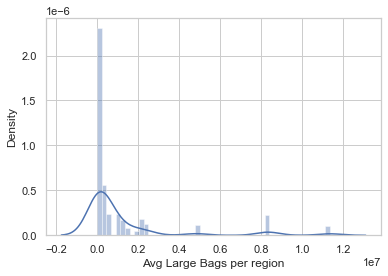

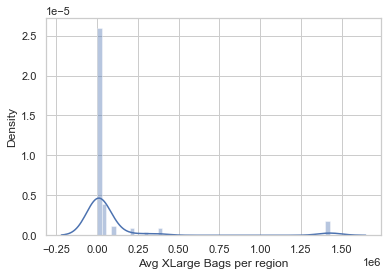

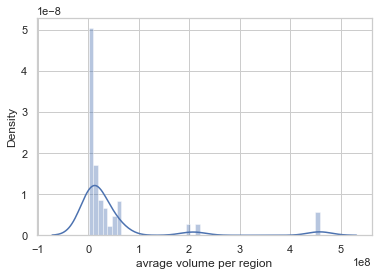

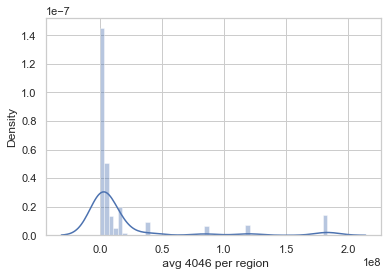

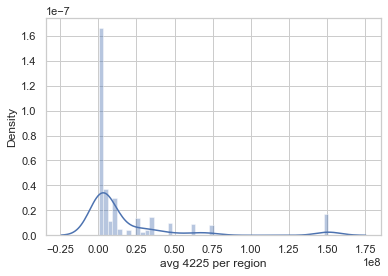

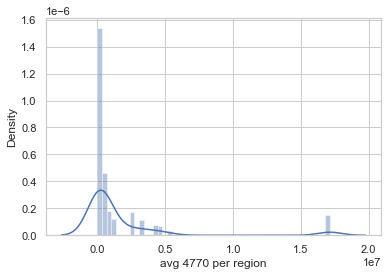

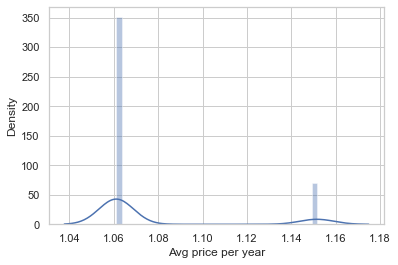

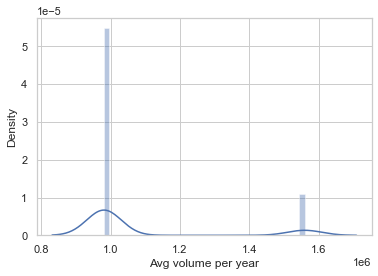

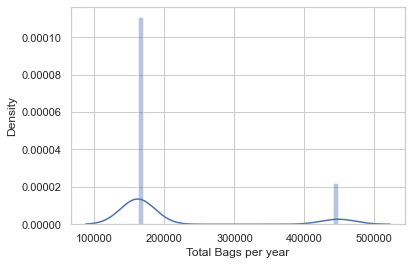

In [410]:
#Cheking skewness

for i in df._get_numeric_data().columns:
    sns.distplot(df[i])
    plt.show()

In [411]:
df.skew()

AveragePrice                 -0.124174
Total Volume                  2.298999
4046                          2.639155
4225                          2.072713
4770                          3.114816
Total Bags                    3.349434
Small Bags                    3.540428
Large Bags                    4.395406
XLarge Bags                   6.750071
year                          1.801500
Month                         0.090850
day                           0.040694
avrage price per month        0.347344
avrage price per region      -0.821566
avrage volume per month       0.109924
 avg 4046 per month           0.345330
avg 4225 per month            0.113720
avg 4770 per month            0.300811
Avg Total Bags per month     -0.084474
Avg Small Bags per month     -0.049914
Avg Large Bags per month      0.193713
Avg XLarge Bags per month    -0.312072
Avg Total Bags per region     3.558349
Avg Small Bags per region     3.679924
Avg Large Bags per region     2.750556
Avg XLarge Bags per regio

In [412]:
#exept month and average price all are highly skewed
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'day', 'avrage price per month', 'avrage price per region',
       'avrage volume per month', ' avg 4046 per month', 'avg 4225 per month',
       'avg 4770 per month', 'Avg Total Bags per month',
       'Avg Small Bags per month', 'Avg Large Bags per month',
       'Avg XLarge Bags per month', 'Avg Total Bags per region',
       'Avg Small Bags per region', 'Avg Large Bags per region',
       'Avg XLarge Bags per region', 'avrage volume per region',
       ' avg 4046 per region', 'avg 4225 per region', 'avg 4770 per region',
       'Avg price per year', 'Avg volume per year', 'Total Bags per year'],
      dtype='object')

# Data cleaning and transformation

In [413]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop(labels="region",axis=1)))
z

(1492, 34)


array([[1.33549564, 0.58639827, 0.51675049, ..., 0.44541394, 0.44541394,
        0.44541394],
       [1.44067442, 0.59181852, 0.51719873, ..., 0.44541394, 0.44541394,
        0.44541394],
       [0.76808006, 0.5551359 , 0.51704981, ..., 0.44541394, 0.44541394,
        0.44541394],
       ...,
       [2.07174713, 0.51407056, 0.45111686, ..., 2.24510263, 2.24510263,
        2.24510263],
       [1.86138956, 0.51763394, 0.46471298, ..., 2.24510263, 2.24510263,
        2.24510263],
       [2.12433653, 0.52027901, 0.46069594, ..., 2.24510263, 2.24510263,
        2.24510263]])

In [414]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((1492-1322)/1492)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(1322, 34)
using z score percentage of outlier removed: 11.394101876675604


In [415]:
#Transforming the catagorical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['region','year']
for i in variable:
    df_new[i] = lb.fit_transform(df_new[i])

In [416]:

df_new.skew()


AveragePrice                 -0.265709
Total Volume                  3.322034
4046                          3.819736
4225                          2.857011
4770                          3.891801
Total Bags                    3.736766
Small Bags                    3.839213
Large Bags                    3.745195
XLarge Bags                   5.829213
year                          1.998871
region                        0.301338
Month                         0.099961
day                           0.030694
avrage price per month        0.343120
avrage price per region      -0.956050
avrage volume per month       0.104448
 avg 4046 per month           0.340139
avg 4225 per month            0.109069
avg 4770 per month            0.297966
Avg Total Bags per month     -0.084793
Avg Small Bags per month     -0.050091
Avg Large Bags per month      0.196567
Avg XLarge Bags per month    -0.317109
Avg Total Bags per region     2.476550
Avg Small Bags per region     2.262134
Avg Large Bags per region

In [417]:
#This x1 and y1 is for linear prediction
x1=df_new.drop(labels="AveragePrice",axis=1)
y1=df_new["AveragePrice"]


In [418]:
#This x1 and y1 is for linear prediction
x=df_new.drop(labels="region",axis=1)
y=df_new["region"]

In [420]:
#removing the skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method=("yeo-johnson"))
x=power_transform(x,method=("yeo-johnson"))
x1=pd.DataFrame(x1)
x=pd.DataFrame(x)
print(x1.skew(),"\n",x.skew())


0     0.021302
1     0.032013
2    -0.042777
3     0.036271
4     0.034018
5     0.036632
6     0.006301
7     0.464228
8     1.998871
9    -0.051478
10   -0.034324
11   -0.038357
12   -0.043420
13   -0.032874
14   -0.004735
15    0.029323
16   -0.010037
17   -0.023224
18   -0.034523
19   -0.029228
20   -0.003703
21   -0.001080
22    0.000907
23    0.011908
24   -0.021596
25   -0.000241
26   -0.046037
27    0.056715
28   -0.015793
29   -0.003353
30    0.000000
31    1.998871
32    1.998871
dtype: float64 
 0     0.025147
1     0.019697
2    -0.059391
3    -0.007568
4    -0.076995
5     0.000825
6     0.001201
7    -0.150914
8     0.601546
9     1.998871
10   -0.141996
11   -0.216943
12    0.008925
13   -0.047060
14   -0.069594
15   -0.040414
16   -0.051955
17   -0.036010
18   -0.087486
19   -0.075940
20   -0.033074
21   -0.057227
22    0.048984
23    0.052237
24   -0.041359
25   -0.053010
26    0.026619
27   -0.040214
28    0.033955
29   -0.056589
30    0.000000
31    1.998871
32    1.

# Model Fitting( average prize prediction)

In [449]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [422]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=x)
        md=model()
        md.fit(x1_train,y1_train)
        predict=md.predict(x1_test)
        r2score=r2_score(y1_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [423]:
model_select(LinearRegression)

Max score is 0.7446715163736504 with random state 103


In [424]:
model_select(KNeighborsRegressor)

Max score is 0.7194411236672393 with random state 103


In [425]:
model_select(DecisionTreeRegressor)

Max score is 0.7721599924228687 with random state 66


In [426]:
model_select(SVR)

Max score is 0.7832502226357551 with random state 103


In [427]:
model_select(Ridge)

Max score is 0.7400150916476864 with random state 103


In [428]:
model_select(RandomForestRegressor)

Max score is 0.8696730064382546 with random state 58


In [429]:
#from above model performance we can see that RandomForestRegressor gives best accuracy with random state 86 so lets proceed with that model

In [431]:
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=86)
print(x1_train.shape, x1_test.shape)

(885, 33) (437, 33)


In [432]:
cross_val_score(RandomForestRegressor(),x1_train,y1_train,cv=5).mean()

0.8099478707070071

In [433]:
rg=RandomForestRegressor()
rg.fit(x1_train,y1_train)
print(rg.score(x1_train, y1_train))

0.9761741109834405


In [450]:
#Hyperparameter tuning
rf= RandomForestRegressor()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x1_train,y1_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestRegressor(max_depth=10, n_estimators=15)

In [451]:
rf=grid_cv.best_estimator_
rf.fit(x1_train,y1_train)
print(rf.score(x1_train, y1_train))

0.9518095041162686


In [453]:
predict=rf.predict(x1_test)

pd.Series(predict)


0      0.770978
1      1.148033
2      1.446014
3      1.201918
4      1.163902
         ...   
432    1.055092
433    1.040090
434    1.087227
435    0.893535
436    1.071903
Length: 437, dtype: float64

In [454]:
print("R2 score is "+str(r2_score(y1_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y1_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y1_test,predict)))

R2 score is 0.841383215965688
Mean absolute error is 0.05887245178593735
Mean squared error is 0.00607267682939123


In [455]:
y1_test

298     0.68
841     1.18
1480    1.33
1346    1.22
655     1.16
        ... 
568     1.00
141     0.96
926     0.99
1312    0.94
147     1.12
Name: AveragePrice, Length: 437, dtype: float64

Text(0, 0.5, 'Predicted Y')

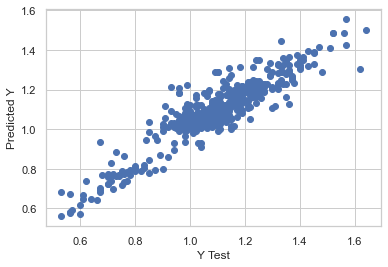

In [456]:
# Plotting the actual y and predicted y
plt.scatter(x=y1_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [458]:
#lets save this model since we have satisfied with the accuracy
#now we can the predict the avarage price of avacado sold based on the atributes values
import pickle

In [459]:
filename="avacado_regression.pkl"
pickle.dump(rf,open(filename,"wb"))

# Model Fitting(Region prediction)

In [460]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [461]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [462]:
model_select(SVC)

Max score is 0.9794050343249427 with random state 86


In [463]:
model_select(LogisticRegression)

Max score is 0.9977116704805492 with random state 45


In [464]:
model_select(GaussianNB)

Max score is 1.0 with random state 47


In [465]:
model_select(RandomForestClassifier)

Max score is 1.0 with random state 42


In [466]:
model_select(KNeighborsClassifier)

Max score is 0.8627002288329519 with random state 52


In [467]:
model_select(DecisionTreeClassifier)

Max score is 1.0 with random state 45


In [468]:
model_select(AdaBoostClassifier)

Max score is 0.40045766590389015 with random state 83


In [469]:
#From the above model training we can see random forest performs best at random state 76 lets proceed with these values

In [470]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=76)
print(x_train.shape, x_test.shape)

(885, 33) (437, 33)


In [471]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()

0.9988700564971751

In [472]:
#CV score and accuracy score is nearly same..will go for optimization for better accuracy

In [473]:
#optimization
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [474]:
rf= RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=5)

In [480]:
rg = grid_cv.best_estimator_

rg.fit(x_train, y_train)
pred_rf = rg.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_rf ))
print("\n")
print("classificationreport", classification_report(y_test,pred_rf))
print("accuracy score",accuracy_score(y_test,pred_rf))

confusion matrix [[23  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 12]]


classificationreport               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00    

<AxesSubplot:>

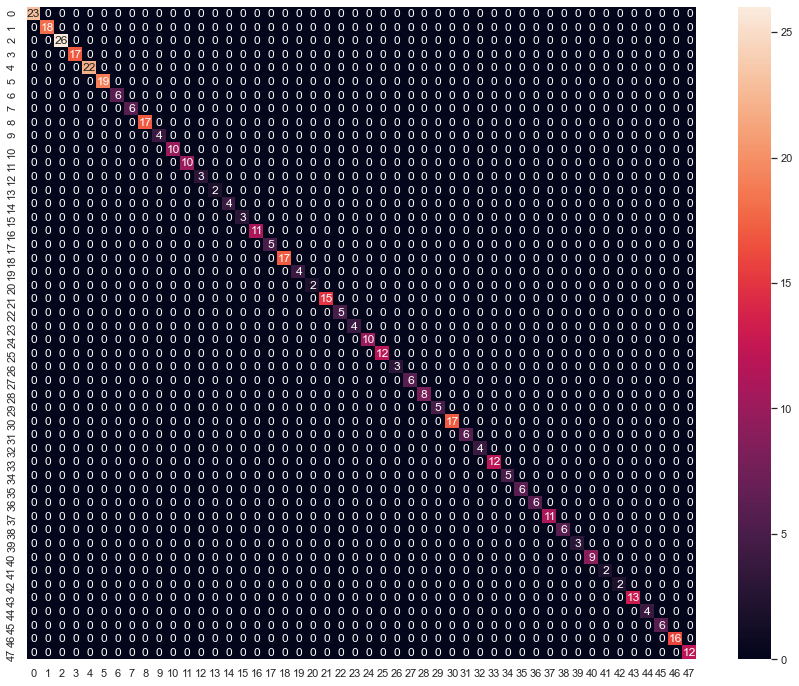

In [482]:
#confusion matrix in heat map
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True)

Text(0, 0.5, 'Predicted Y')

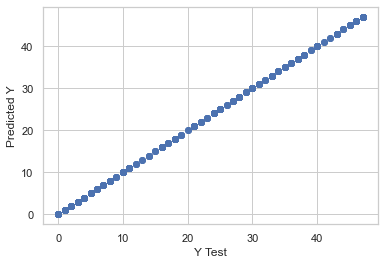

In [486]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [487]:
#Graph show the values predicted by model campared to actual values of y
#now we can find the predict the region of avacado sold based on the attribute values
#saving the model


In [489]:
import pickle
filename="avacado_clasification.pkl"
pickle.dump(rg,open(filename,"wb"))